* 不錯的對岸文章 : http://blog.pluskid.org/?p=39
* PDF 介紹資料 : http://www.cs.nccu.edu.tw/~whliao/acv2008/08gmm.pdf
* [參考資料](http://waoffice.ee.kuas.edu.tw/download/%E5%BB%BA%E5%BE%B7%E7%A0%94%E7%A9%B6%E6%89%80%E8%B3%87%E6%96%99/%E4%B8%83%E6%9C%88%E8%AA%B2%E7%A8%8B/%E9%AB%98%E6%96%AF%E6%B7%B7%E5%90%88%E6%A8%A1%E5%9E%8B/%E9%AB%98%E6%96%AF%E6%B7%B7%E5%90%88%E6%A8%A1%E5%9E%8B.ppt)
* 這一篇我覺得他說明的最好 : https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/

In [1]:


from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))

X_train = np.load('data.npy')



-0.59696417422793679

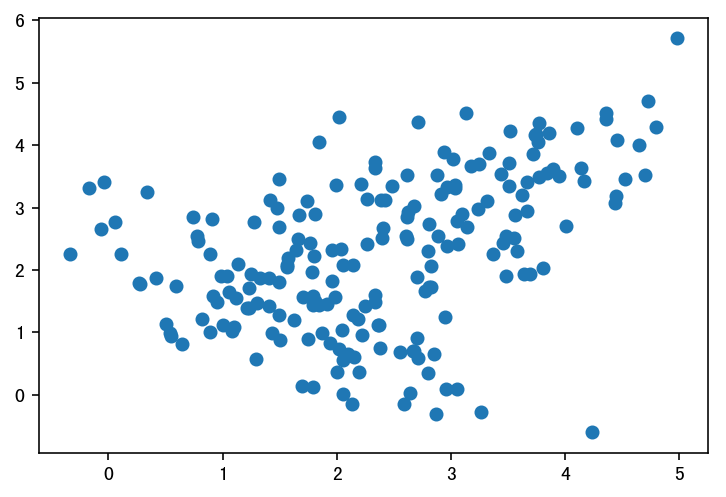

In [54]:
plt.scatter(X_train[:,0],X_train[:,1])

(-1, 6)

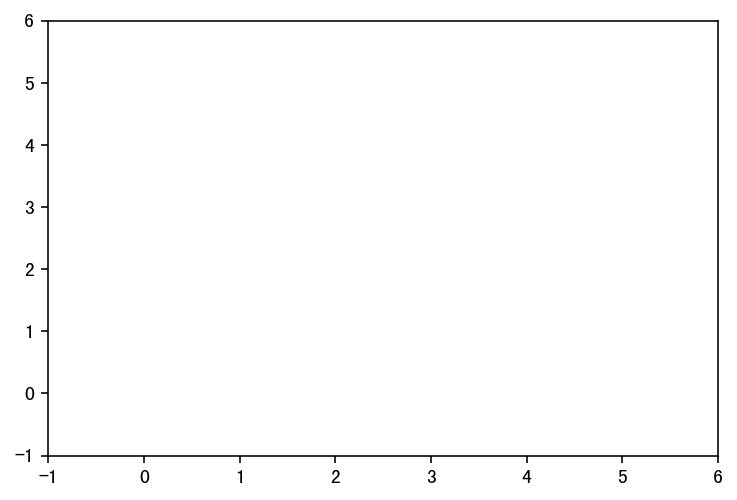

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -1, 6))
ax.set_ylim((-1, 6))




# 動畫呈現 Clustering 的過程

In [41]:
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    gmm = GaussianMixture(n_components=2,max_iter=i+1,init_params='random',random_state=10)
    gmm.fit(X_train)
    X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = gmm.score_samples(XX)
    Z = Z.reshape((50,50))

#     print(gmm.means_)
#     print('\n')
#     print(gmm.covariances_)
    ax.clear()
    ax.contour(X, Y, Z)
    ax.scatter(X_train[:, 0], X_train[:, 1])
    ax.scatter(gmm.means_[0][0],gmm.means_[0][1],c='red',marker="*",s=300)
    ax.scatter(gmm.means_[1][0],gmm.means_[1][1],c='green',marker="*",s=300)
    

    return (line,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=600, blit=True)


animate(1)

/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


(<matplotlib.lines.Line2D at 0x10d132d68>,)

In [42]:
anim


/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


# 細究 Clustering 的結果

In [55]:
gmm = GaussianMixture(n_components=2,max_iter=20,init_params='random',random_state=10)
gmm.fit(X_train)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))

In [69]:
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

# 白話版說明:


In [101]:
# 看一下中心點的位置
gmm.means_

array([[ 2.99880061,  3.06334164],
       [ 1.60529513,  1.33301123]])

In [107]:
# 第 0 個 cluster
gmm.predict_proba(np.array([[ 2.99880061,  3.06334164]]))

array([[  9.99968388e-01,   3.16121217e-05]])

In [111]:
gmm.score(np.array([[ 2.99880061,  3.06334164]]))

-2.1150527412653539

In [112]:
# 第 1 個 cluster
gmm.predict_proba(np.array([[1.60529513,  1.33301123]]))

array([[ 0.09915511,  0.90084489]])

In [113]:
gmm.score(np.array([[1.60529513,  1.33301123]]))

-1.8992408341476634

In [116]:
# 雖然判為第 0 個 cluster ，但是 score 超低
gmm.predict_proba(np.array([[-2,  -2]]))

array([[  1.00000000e+00,   3.61314052e-14]])

In [119]:
gmm.score(np.array([[-2,  -2]]))

-22.527239128551489